In [ ]:
# THis is the training notebook for Ensemble Learning. Created by Deepak Sharma (deepak.sharma@noodle.ai)

# Basics of Ensemble Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = 'Housing.csv'

housingDF = pd.read_csv(fileName)

In [3]:
housingDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B1000,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


In [4]:
housingDF.shape

(506, 14)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
Y = housingDF['MEDV']

X = housingDF.iloc[:,0:(housingDF.shape[1] - 1)]

In [7]:
XTrain, XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.2)

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeRegressor(max_depth=2)

In [10]:
clf.fit(XTrain, YTrain)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [11]:
yPred = clf.predict(XTrain)

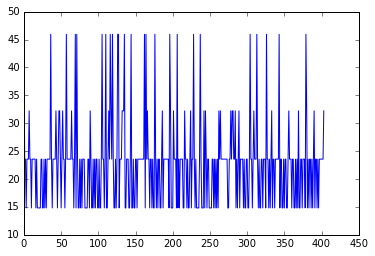

In [12]:
plt.plot(yPred)
plt.show()

In [13]:
yGradient = [-2*(x - yPred[i]) for i,x in enumerate(YTrain)]

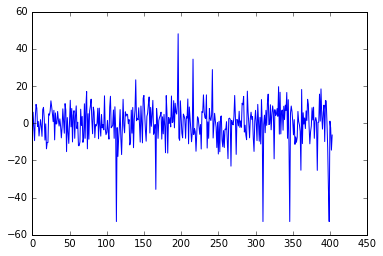

In [14]:
plt.plot(yGradient)
plt.show()

In [15]:
newCLF = tree.DecisionTreeRegressor(max_depth=2)

In [16]:
newCLF.fit(XTrain, yGradient)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [17]:
a = newCLF.decision_path(XTrain)

In [18]:
a.shape

(404, 7)

In [23]:
aNP = a.toarray()

aList = [list(aNP[i,]) for i in range(aNP.shape[0])]

In [35]:
aUnique = np.vstack({tuple(row) for row in aNP})

In [37]:
aUnqList = [list(aUnique[i,]) for i in range(aUnique.shape[0])]

In [44]:
def compareLists(l1, l2) :
    
    diff = [abs((x - l2[i])) for i,x in enumerate(l1)]
    
    if (sum(diff) == 0) :
        return True
    else :
        return False
    
def matchListIndex(ll, l2) :
    
    return [i for i,x in enumerate(ll) if(compareLists(x,l2))][0]

In [45]:
pathIndex = [matchListIndex(aUnqList, x) for x in aList]

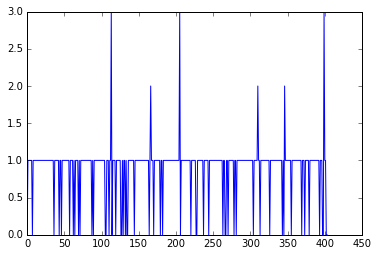

In [46]:
plt.plot(pathIndex)
plt.show()

In [47]:
predPrev = clf.predict(XTrain)

In [54]:
YTrainList = list(YTrain)

In [55]:
residual = [(YTrainList[i] - x) for i,x in enumerate(predPrev)]

In [56]:
uniqueRegions = list(set(pathIndex))

regionGamma = [0]*len(uniqueRegions)

ind = 0

for i in uniqueRegions :
    
    temp = [x for j,x in enumerate(residual) if(pathIndex[j] == i)]
    
    regionGamma[ind] = float(sum(temp))/float(len(temp))
    
    ind += 1

In [57]:
newCLF.tree_.threshold

array([ 5.23000002,  3.45420504, -2.        , -2.        ,  1.17359996,
       -2.        , -2.        ])

In [58]:
newCLF.tree_.feature

array([12,  0, -2, -2,  7, -2, -2], dtype=int64)